In [20]:
import rasterio
import PIL
import numpy as np
import matplotlib.pyplot as plt
import os

### Load singel tif

In [6]:
fp = "/Users/ninawiedemann/Desktop/thesis/data/Instance_DE.nosync/corridor/Corridor.tif"
with rasterio.open(fp, 'r') as ds:
    layer = ds.read()[0]
    # layer[layer<0] = 200
    print(ds.profile)

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 3724, 'height': 3078, 'count': 1, 'crs': CRS.from_epsg(25832), 'transform': Affine(10.0, 0.0, 702976.7547,
       0.0, -10.0, 5415257.3133), 'tiled': False, 'interleave': 'band'}


In [7]:
np.unique(layer[layer>0])

array([ 270.53625,  270.57486,  270.61856, ..., 1442.7158 , 1442.8195 ,
       1443.2285 ], dtype=float32)

In [8]:
np.where(layer<0)

(array([  0,   0,   0, ..., 634, 635, 636]), array([0, 1, 2, ..., 1, 0, 0]))

### Write dataset (with profile) to change tif shape

In [62]:
from scipy.ndimage.morphology import binary_erosion, binary_dilation

(3078, 3724)
| 10.00, 0.00, 702976.75|
| 0.00,-10.00, 5415257.31|
| 0.00, 0.00, 1.00|


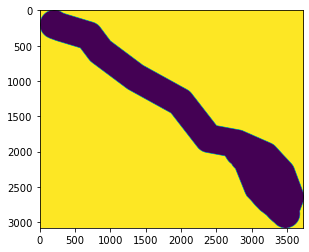

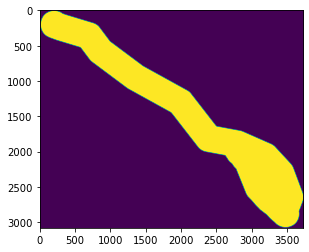

2


In [73]:
fp = "/Users/ninawiedemann/Desktop/thesis/data/instance_DE.nosync/corridor/Corridor_orig.tif"
with rasterio.open(fp, 'r') as ds:
    layer = ds.read()[0]
    print(layer.shape)
    transform_matrix = ds.transform
    a = ds.dataset_mask()# / 255.
    print(transform_matrix)
    plt.imshow(layer)
    plt.show()
    mod_layer = (layer==1).astype(int) # [:-1,:-1]
    # mod_layer = 
    for _ in range(10):
        mod_layer = binary_erosion(mod_layer)
    plt.imshow(mod_layer)
    plt.show()
    profile_dict = ds.profile
    with rasterio.open('Corridor.tif', 'w', **profile_dict) as dst:
        dst.write(mod_layer.astype(np.int16), 1)
    # 

print(len(np.unique(layer)))

In [23]:
os.path.exists("/Users/ninawiedemann/Desktop/thesis/data/instance_CH.nosync/corridor/Corridor.tif")

True

In [76]:
base = "/Users/ninawiedemann/Desktop/thesis/data/instance_CH.nosync/tif_layers" # instance_DE.nosync/Suchraum.tif"
arr = []
for fp in os.listdir(base):
    if os.path.exists(os.path.join(base, fp)) and fp[0]!=".":
        with rasterio.open(os.path.join(base, fp) , 'r') as ds: # os.path.join(base,"Corridor.tif")
            layer = ds.read()[0]
            # transform_matrix = ds.transform
            arr.append((layer == 1).astype(int))
arr = np.asarray(arr)

In [77]:
arr.shape

(29, 3120, 2092)

In [78]:
all_layers = np.sum(arr, axis=0)

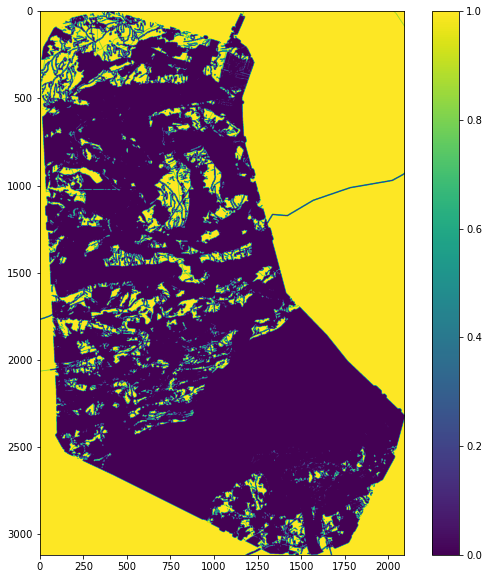

In [90]:
plt.figure(figsize=(10,10))
plt.imshow(LWZ)
plt.colorbar()
plt.show()

In [89]:
LWZ = ((all_layers==0).astype(int)).astype(np.uint8)

In [91]:
with rasterio.open(os.path.join(base, fp) , 'r') as ds:
    profile_dict = ds.profile
    with rasterio.open('Landwirtschaftszonen.tif', 'w', **profile_dict) as dst:
        dst.write(LWZ.astype(np.uint8), 1)

(3120, 2092)
[0. 1.]


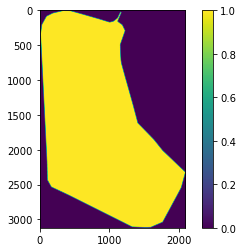

In [95]:
base = "/Users/ninawiedemann/Desktop/thesis/data/instance_CH.nosync/corridor/Corridor.tif" # instance_DE.nosync/Suchraum.tif"
with rasterio.open(base , 'r') as ds: # os.path.join(base,"Corridor.tif")
    layer = ds.read()[0]
    transform_matrix = ds.transform
    print(layer.shape)
    print(np.unique(layer))
    plt.imshow(layer)
    plt.colorbar()
    plt.show()

In [ ]:
base = "/Users/ninawiedemann/Desktop/thesis/data/large_instance/corridor"
with rasterio.open(os.path.join(base,"Corridor.tif"), "r") as infile:
    layer = ds.dataset_mask() / 255
    print(layer.shape)
    print(np.unique(layer, return_counts=True))
    transform_matrix = ds.transform
    a = ds.dataset_mask()# / 255.
    print(transform_matrix)

In [54]:
import shapefile
def get_shape_polygon(path, transform_matrix):
    sf = shapefile.Reader(path)
    polygon_point = sf.shapes()[0].points
    points = []
    for p in polygon_point:
        transformed = ~transform_matrix * p
        points.append(transformed)
    # resized = np.asarray(transformed) / self.scale_factor
    # return resized.astype(int) + self.padding, np.asarray(transformed).astype(int)
    return np.asarray(points).astype(int)

In [55]:
arr = get_shape_polygon("/Users/ninawiedemann/Desktop/thesis/data/instance_CH.nosync/Scenario_BAFU/Scenario_BAFU", transform_matrix)


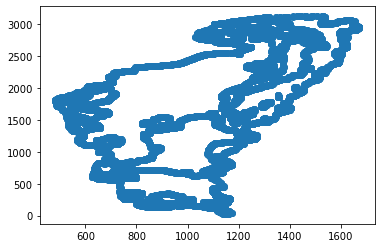

In [58]:
plt.scatter(arr[:,0], arr[:,1])

### data

In [69]:
import pickle
with open("../../data/instance_CH.nosync/ch_dump_s1_1.dat", "rb") as infile:
    data = pickle.load(infile)
    (instance, instance_corr, start_inds, dest_inds) = data.data

In [71]:
instance.shape

(3, 2092, 3120)

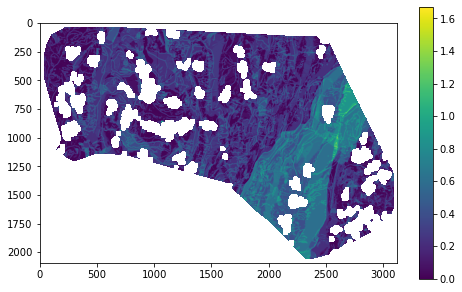

In [72]:
visualize_corr = 1 - instance_corr
visualize_corr[visualize_corr == 1] = np.inf
plt.figure(figsize=(8, 5))
plt.imshow(np.sum(instance, axis=0) + visualize_corr)
plt.colorbar()
plt.show()

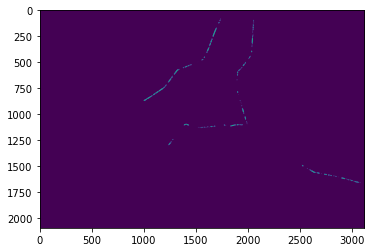

In [73]:
a = np.sum(instance, axis=0) + visualize_corr
plt.imshow(a==0)

In [17]:
data.class_weights

[1]

### List shapes of all layers

In [ ]:
fp = "/Users/ninawiedemann/Desktop/thesis/power_planner.nosync/data/Instance_CH/tif_layers/"
for f in os.listdir(fp):
    if f[-3:]!= "tif":
        continue
    with rasterio.open(fp+f, 'r') as ds:
        layer = ds.read()[0] 
    print(f, np.unique(layer, return_counts=True))
    # plt.imshow(layer)
    # plt.show()

## Find common ground

In [28]:
with rasterio.open(os.path.join(base, "instance_DE.nosync", "corridor", "Corridor.tif"), 'r') as ds:
    layer = (ds.read()[0]==1).astype(int)
print(layer.shape)

(3078, 3724)


large_instance
(5656, 4280)
[  1 255] [1.]
20252753


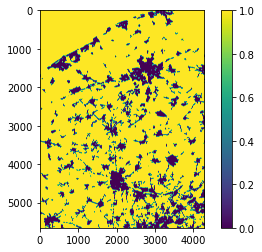

Instance_CH.nosync
(3120, 2092)
[0. 1.] [1.]
4033661


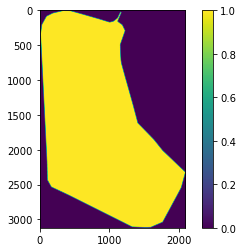

belgium.nosync
(1313, 1511)
[  1 255] [1.]
1908283


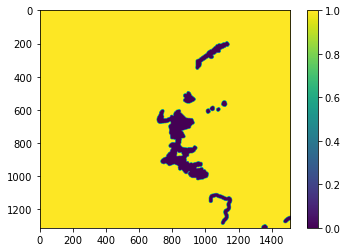

instance_DE.nosync
(3078, 3724)
[0 1] [1.]
2107763


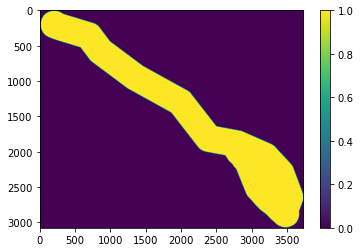

In [76]:
base = "/Users/ninawiedemann/Desktop/thesis/data/"
for data in os.listdir(base):
    if data!=".DS_Store":
        print(data)
        with rasterio.open(os.path.join(base, data, "corridor", "Corridor.tif"), 'r') as ds:
            # layer_mask = ds.dataset_mask() / 255
            layer = ds.read()[0]
        print(layer.shape)
        print(np.unique(layer), np.unique(layer_mask))
        plt.imshow((layer==np.max(layer)).astype(int))
        print(np.sum(layer==np.max(layer)).astype(int))
        plt.colorbar()
        plt.show()
        
# /Users/ninawiedemann/Desktop/thesis/data/large_instance/corridor/Corridor.tif

In [45]:
os.path.exists(os.path.join(base, "instance_DE.nosync","tif_layers", "I_2711_Bodendenkmaeler.tif"))

True

In [55]:
tuple([1]) + (2,3)

(1, 2, 3)

In [50]:
hard_constraints = np.all(
            np.asarray([]).astype(int), axis=0
        )

## Import shape point

In [ ]:
import shapefile

In [ ]:
def shape_point(shape_path, transform_matrix):
    sf = shapefile.Reader(shape_path)
    startendpoint = sf.shapes()[0].points
    transformed = ~transform_matrix * startendpoint[0]
    return np.array(transformed).astype(int)
base_path = "/Users/ninawiedemann/Desktop/thesis/power_planner.nosync/data/Instance_CH/"
interm = "interm_1/interm_1"
start = "start_point/Start"
dest = "dest_point/Destination"

In [ ]:
s = shape_point(base_path+start, transform_matrix)
i = shape_point(base_path+interm, transform_matrix)
d = shape_point(base_path+dest, transform_matrix)
plt.scatter(*i)
plt.scatter(*s)
plt.scatter(*d)
plt.imshow(SOME LAYER HERE)
plt.show()

### Save as tif

In [ ]:
from PIL import Image

In [ ]:
img = Image.fromarray(layer)
img.save(os.path.join("/Users/ninawiedemann/Desktop/thesis/power_planner.nosync/data/Instance_CH/", "Flugplatz.tif")) # df.loc[i]["class"]
# plt.imshow(img)
# plt.savefig(os.path.join

## Create tif layers for figure

In [ ]:
from PIL import Image
figure_path = "/Users/ninawiedemann/Desktop/thesis/figure/layers"

In [ ]:
together_arr = []
for i in range(len(arr)):
    print(df.loc[i]["class"])
    n,c = np.unique(arr[i], return_counts=True)
    if c[1]>100000:
        img = Image.fromarray(arr[i])
        m,n = arr[i].shape
        img = img.resize((m//10, n//10), resample=Image.BILINEAR)
        together_arr.append(np.array(img))
        img.save(os.path.join(figure_path, str(i)+".tif")) # df.loc[i]["class"]
        # plt.imshow(img)
        # plt.savefig(os.path.join(figure_path,df.loc[i]["class"], str(i)+".jpg"))

In [ ]:
together_arr = np.asarray(together_arr)
print(together_arr.shape)
plt.imshow(np.sum(together_arr, axis=0), cmap='Greys')
plt.axis("off")
plt.tight_layout()
plt.savefig("together.png")